# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [51]:
print("17 bank campaigns that occurred between May 2008 and November 2010.\n79354 calls made.\nThere was an 8% success rate (6499 subscriptions for deposits).")

17 campaigns that occurred between May 2008 and November 2010.
79354 contacts.
There was an 8% success rate (6499).


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [190]:
import pandas as pd
import numpy as np

# data viz
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz 
#plt.style.use('fivethirtyeight')

# pre-processing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer

# modeling
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier

# validation
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

# evaluation
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import classification_report, permutation_importance, confusion_matrix, accuracy_score, recall_score, precision_score, log_loss, roc_auc_score, roc_curve, auc
import time
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None) 

print("All modules loaded")


All modules loaded


In [53]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [54]:
df.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
37429,28,admin.,single,university.degree,no,no,no,cellular,aug,wed,202,1,999,0,nonexistent,-2.9,92.201,-31.4,0.879,5076.2,no
33260,34,self-employed,single,university.degree,no,yes,no,cellular,may,tue,245,1,999,0,nonexistent,-1.8,92.893,-46.2,1.291,5099.1,no
36558,27,blue-collar,single,basic.6y,no,yes,no,cellular,jun,wed,334,3,999,0,nonexistent,-2.9,92.963,-40.8,1.260,5076.2,no
4148,24,admin.,single,high.school,no,yes,no,telephone,may,mon,243,6,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
18065,28,self-employed,married,university.degree,no,yes,no,cellular,jul,wed,695,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
27427,31,admin.,single,university.degree,no,yes,yes,cellular,nov,fri,75,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
18243,53,technician,married,professional.course,unknown,no,no,telephone,jul,wed,191,3,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
23584,32,technician,married,university.degree,no,yes,no,cellular,aug,thu,151,2,999,0,nonexistent,1.4,93.444,-36.1,4.962,5228.1,no
32776,30,admin.,single,high.school,no,no,no,cellular,may,mon,133,1,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no
12185,57,retired,divorced,university.degree,no,no,no,telephone,jul,tue,156,2,999,0,nonexistent,1.4,93.918,-42.7,4.955,5228.1,no


In [55]:
df.shape

(41188, 21)

In [56]:
# target variable 'y' is the outcome of the marketing campaign
df.y.value_counts(normalize=True).round(2)

y
no     0.89
yes    0.11
Name: proportion, dtype: float64

In [57]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [58]:
df['housing'].value_counts(normalize=True).round(2)

housing
yes        0.52
no         0.45
unknown    0.02
Name: proportion, dtype: float64

In [59]:
df['loan'].value_counts(normalize=True).round(2)

loan
no         0.82
yes        0.15
unknown    0.02
Name: proportion, dtype: float64

In [60]:
df['month'].value_counts()

month
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: count, dtype: int64

In [61]:
df['age'].value_counts()

age
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: count, Length: 78, dtype: int64

In [62]:
df['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [63]:
df['marital'].value_counts()

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

In [64]:
df['education'].value_counts(normalize=True).round(2)

education
university.degree      0.30
high.school            0.23
basic.9y               0.15
professional.course    0.13
basic.4y               0.10
basic.6y               0.06
unknown                0.04
illiterate             0.00
Name: proportion, dtype: float64

In [65]:
df['default'].value_counts()
# drop this since only 3 people have defaulted

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

In [66]:
df['contact'].value_counts()

contact
cellular     26144
telephone    15044
Name: count, dtype: int64

In [70]:
df['poutcome'].value_counts()

poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [71]:
print("The objective is to predict whether a client will subscribe to a term deposit (variable y) based on the other features in the dataset.")

The objective is to predict whether a client will subscribe to a term deposit (variable y) based on the other features in the dataset.


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [73]:
# dropping duration column as it has no contribution to the model and in fact has a negative effect on it.
# dropping default since it's extremely imbalanced with only 3 data points have a value of yes
df = df.drop(['duration', 'default'], axis=1)

In [74]:
df.shape # get new shape 

(41188, 19)

In [75]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [76]:
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [77]:
df.describe(include = 'object')

,job,marital,education,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,2,10,5,3,2
top,admin.,married,university.degree,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,21576,33950,26144,13769,8623,35563,36548


**Duplicate Check**

In [78]:
df.duplicated().sum()

1997

In [79]:
df = df.drop_duplicates()

In [81]:
df.shape

(39191, 19)

In [82]:
# check how many rows have multiple 'unkown values'
unkowns = df[(df == 'unknown').sum(axis=1) > 3].shape
print(f"Rows with multiple unknown values: {unkowns}")
# print these rows 
df[(df == 'unknown').sum(axis=1) > 3]

Rows with multiple unknown values: (2, 19)


,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
2723,45,unknown,married,unknown,unknown,unknown,telephone,may,wed,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
21556,44,unknown,married,unknown,unknown,unknown,cellular,aug,tue,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no


In [83]:
# drop these 'unkown' rows 
df = df[(df == 'unknown').sum(axis=1) <= 3]
print(f"New shape: {df.shape}")

New shape: (39189, 19)


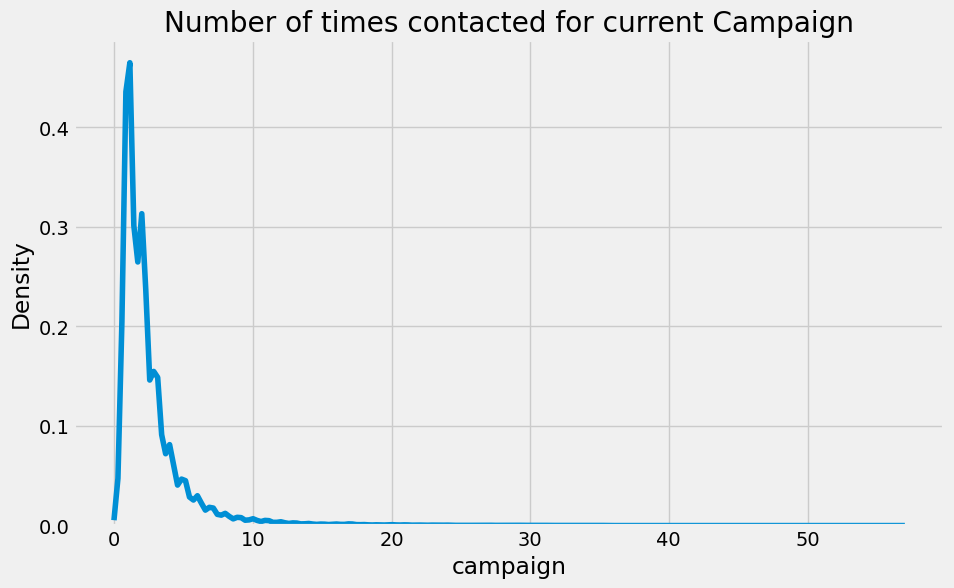

In [86]:
# countplot of campaign 
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='campaign')
plt.title('Number of times contacted for current Campaign')
plt.show()

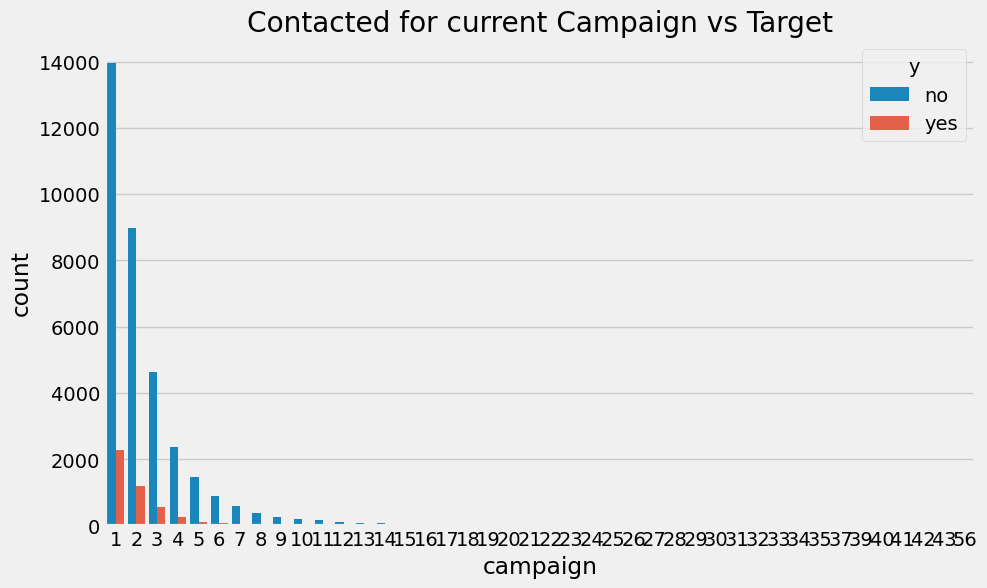

In [87]:
# plot campagin column vs target variable
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='campaign', hue='y')
plt.title('Contacted for current Campaign vs Target')
plt.show()

In [88]:
# count how many customers have a unkown housing, a unkown loan and unkown housing and loan 
unknown_housing_loan = df[(df['housing'] == 'unknown') & (df['loan'] == 'unknown')].shape[0]
unknown_housing = df[df['housing'] == 'unknown'].shape[0]
unknown_loan = df[df['loan'] == 'unknown'].shape[0]
print(f"Customers with unknown housing and loan: {unknown_housing_loan}")
print(f"Customers with unknown housing: {unknown_housing}")
print(f"Customers with unknown loan: {unknown_loan}")
# print customers with unkown housing and loan 
df[(df['housing'] == 'unknown') & (df['loan'] == 'unknown')]

Customers with unknown housing and loan: 978
Customers with unknown housing: 978
Customers with unknown loan: 978


,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
29,55,unknown,married,university.degree,unknown,unknown,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
81,51,blue-collar,married,basic.4y,unknown,unknown,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
261,27,blue-collar,single,basic.6y,unknown,unknown,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
385,59,management,married,basic.4y,unknown,unknown,telephone,may,tue,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
401,48,services,married,high.school,unknown,unknown,telephone,may,tue,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40990,31,admin.,single,university.degree,unknown,unknown,cellular,oct,tue,1,3,1,success,-1.1,94.601,-49.5,1.008,4963.6,yes
41014,31,technician,single,professional.course,unknown,unknown,cellular,oct,thu,2,999,0,nonexistent,-1.1,94.601,-49.5,1.025,4963.6,yes
41015,34,admin.,divorced,university.degree,unknown,unknown,cellular,oct,thu,2,999,1,failure,-1.1,94.601,-49.5,1.025,4963.6,no
41029,46,management,married,university.degree,unknown,unknown,cellular,oct,mon,2,12,2,failure,-1.1,94.601,-49.5,1.032,4963.6,no


In [89]:
# display rows that have unkown housing, loan and y is yes 
df[(df['housing'] == 'unknown') & (df['loan'] == 'unknown') & (df['y'] == 'yes')]
# since there are over a 100 of the instances where the target is yes we won't drop these rows

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
3570,31,blue-collar,married,basic.6y,unknown,unknown,telephone,may,fri,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,yes
4522,27,blue-collar,married,basic.6y,unknown,unknown,telephone,may,tue,2,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,yes
7475,52,services,married,high.school,unknown,unknown,telephone,may,fri,2,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,yes
10171,43,blue-collar,married,basic.4y,unknown,unknown,telephone,jun,thu,2,999,0,nonexistent,1.4,94.465,-41.8,4.958,5228.1,yes
10977,41,services,married,high.school,unknown,unknown,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40875,57,admin.,married,university.degree,unknown,unknown,cellular,oct,wed,2,3,2,success,-1.1,94.601,-49.5,0.959,4963.6,yes
40941,66,retired,married,basic.4y,unknown,unknown,cellular,oct,wed,1,6,3,success,-1.1,94.601,-49.5,0.985,4963.6,yes
40990,31,admin.,single,university.degree,unknown,unknown,cellular,oct,tue,1,3,1,success,-1.1,94.601,-49.5,1.008,4963.6,yes
41014,31,technician,single,professional.course,unknown,unknown,cellular,oct,thu,2,999,0,nonexistent,-1.1,94.601,-49.5,1.025,4963.6,yes


In [90]:
# look for columns that have more than 40 campaign contacts 
df[df['campaign'] > 40]

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4107,32,admin.,married,university.degree,unknown,unknown,telephone,may,mon,56,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
4168,29,technician,married,professional.course,yes,no,telephone,may,mon,42,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
5304,44,retired,married,basic.9y,yes,no,telephone,may,fri,42,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
11033,38,blue-collar,married,basic.4y,yes,no,telephone,jun,wed,41,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
13447,32,technician,single,university.degree,yes,yes,telephone,jul,wed,43,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18728,54,admin.,married,university.degree,yes,no,cellular,jul,thu,43,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


### Key Observations 
- we can see that there are roughly the same amount of categorical and numeric values in the columns.

- All the data inputted are non-null values, meaning that we have a value for every column.

- Subscribed (y) has two values: "yes" and "no".

- default, housing and loan have 3 values each (yes, no and unknown).

- We drop default because of it's imbalanced distribution 
  
- We are discarding duration. This attribute highly affects the target variable (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### Before EDA 
We will rename the following columns to make the EDA more intuitive 
- Rename columns related to a previous campaign to `prior` for clarity 
  - previous -> prior_contacts - (number of time client was contacted for previous campaigns)
  - pdays -> prior_days_since - (number of days passed since contacted about a previous campaign)
  - poutcome -> prior_outcome - (outcome of prior campaign, if it was successful or not)
- contact -> contact_type
- housing -> housing_loan
- loan -> personal_loan
- campaign -> campaign_contacts (number of times client has been contacted for this campaign)
  - maybe remove campaign contacts over 50 or do a log of the 
- y -> subscribed (target variable)

In [92]:
# reanme columns
df = df.rename(columns={'emp.var.rate': 'emp_var_rate', 'cons.price.idx': 'cons_price_idx', 'cons.conf.idx': 'cons_conf_idx', 'nr.employed': 'nr_employees'})
df = df.rename(columns={'housing': 'housing_loan', 'loan': 'personal_loan','contact': 'contact_type','campaign': 'campaign_contacts', 'previous': 'prior_contacts',
    'pdays': 'prior_days_since', 'poutcome': 'prior_outcome', 'y': 'subscribed'})

In [108]:
for col in df.columns:
    print(col,"-->",df[col].unique())

age --> [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
job --> ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital --> ['married' 'single' 'divorced' 'unknown']
education --> ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
housing_loan --> ['no' 'yes' 'unknown']
personal_loan --> ['no' 'yes' 'unknown']
contact_type --> ['telephone' 'cellular']
month --> ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week --> ['mon' 'tue' 'wed' 'thu' 'fri']
campaign_contacts --> [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
prior_days_since -

### EDA

**Univariate Analysis on Target Variable y**

Text(0, 0.5, 'Count')

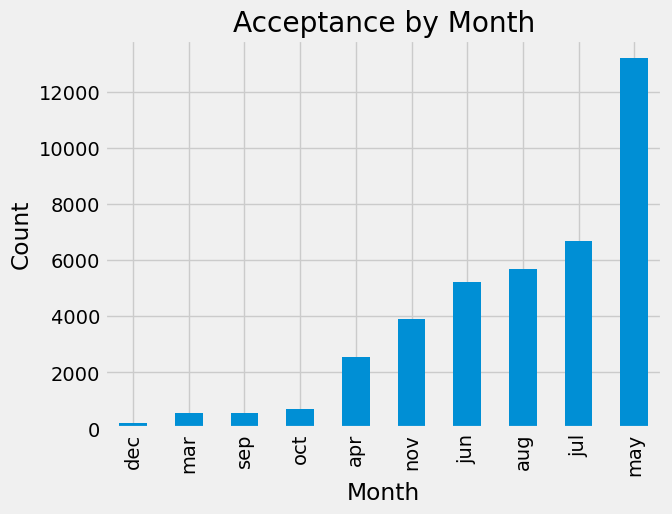

In [94]:
ax = df.groupby('month')['subscribed'] \
    .count().sort_values() \
    .plot(kind = 'bar', title = 'Acceptance by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Subscription Count')

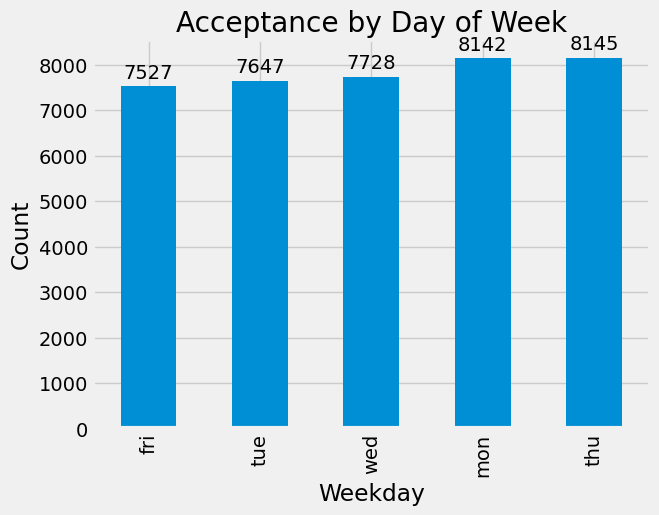

In [95]:
ax = df.groupby('day_of_week')['subscribed'] \
    .count().sort_values() \
    .plot(kind = 'bar', title = 'Acceptance by Day of Week')
ax.set_xlabel('Call Weekday')
ax.set_ylabel('Subscription Count')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    

##### Observations 
- Weekday doesn't seen to have an significant effect on the outcome of the campaign.
- Mondays and Thursdays have the highest subscription rates.
- We can see below that most calls were made on Mondays and Thursdays which might explain the graph above.
- Thursdays has the best call to subscription ratio 

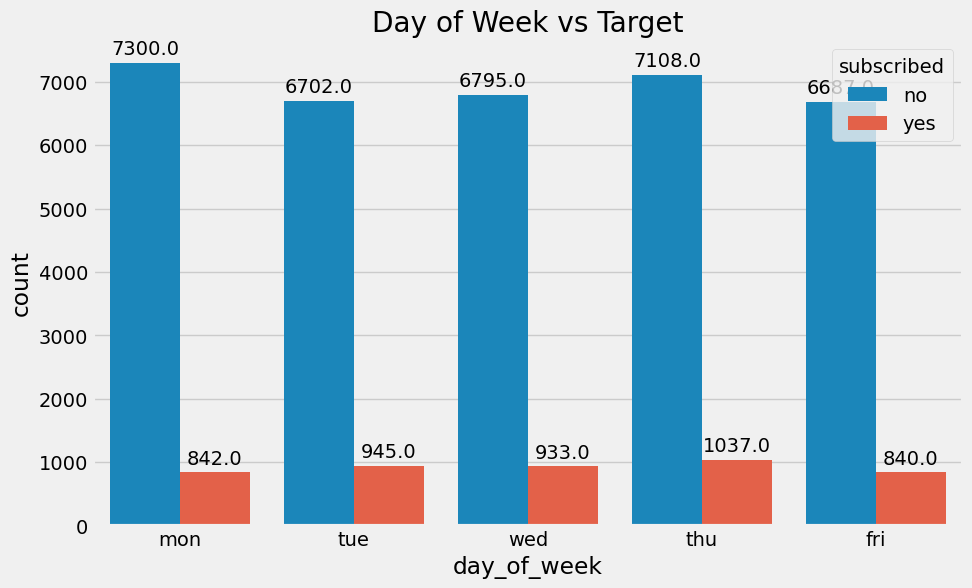

In [96]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Call day_of_week', hue='subscribed')
plt.title('Day of Week vs Target')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

Highest conversion rate for university degree, high school and basic 9y


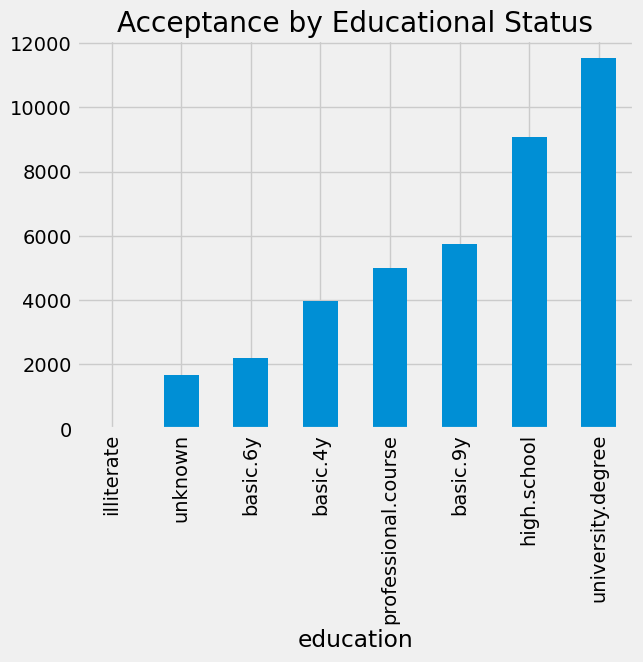

In [97]:
df.groupby('education')['subscribed'].count().sort_values().plot(kind = 'bar', title = 'Acceptance by Educational Status')
print("Highest conversion rate for university degree, high school and basic 9y")
ax.set_ylabel('Subscription Count');

Text(0, 0.5, 'Count')

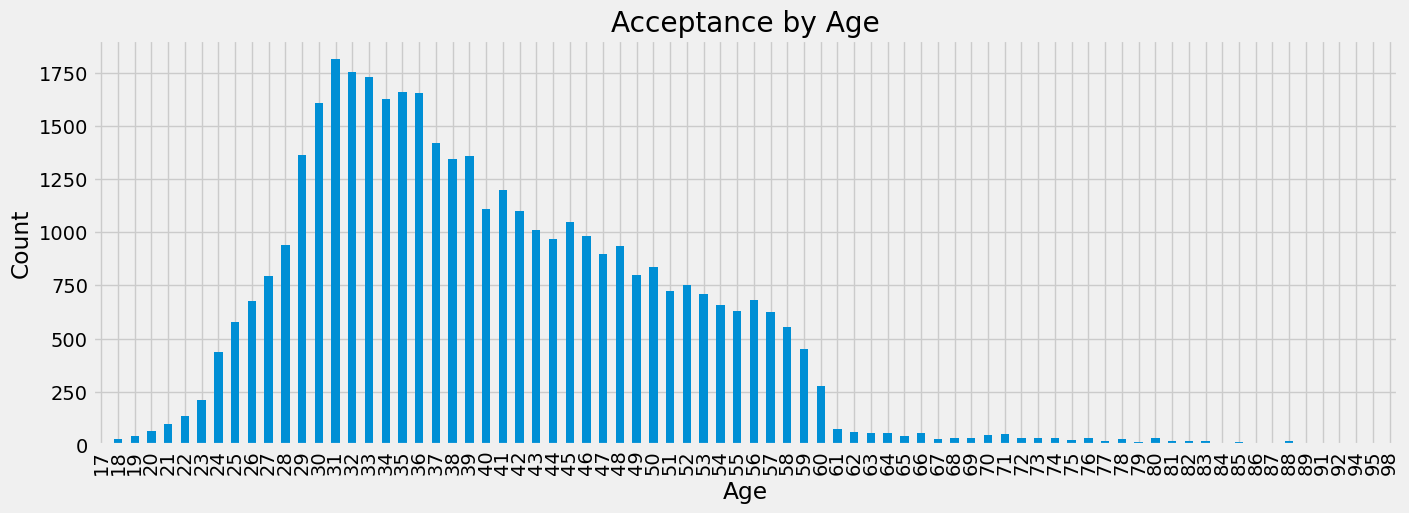

In [98]:
ax = df.groupby('age')['subscribed'].count().plot(kind = 'bar',
                                        title = 'Acceptance by Age',
                                        figsize = (15,5))
ax.set_xlabel('Age')
ax.set_ylabel('Subscription Count');

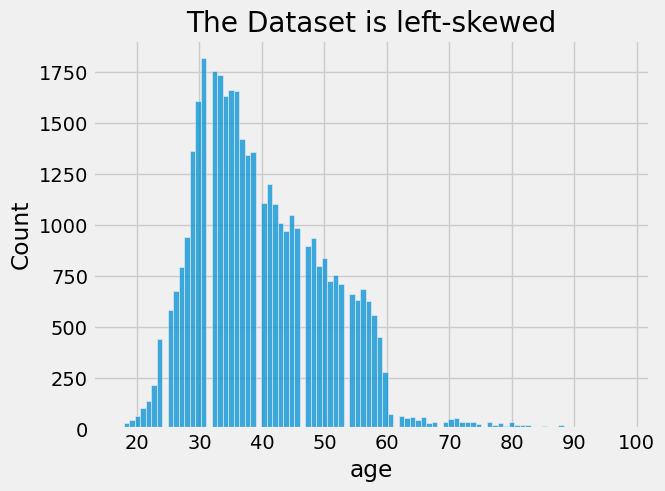

In [99]:
ax = sns.histplot(data = df, x = 'age')
ax.set_title("The Dataset is left-skewed");

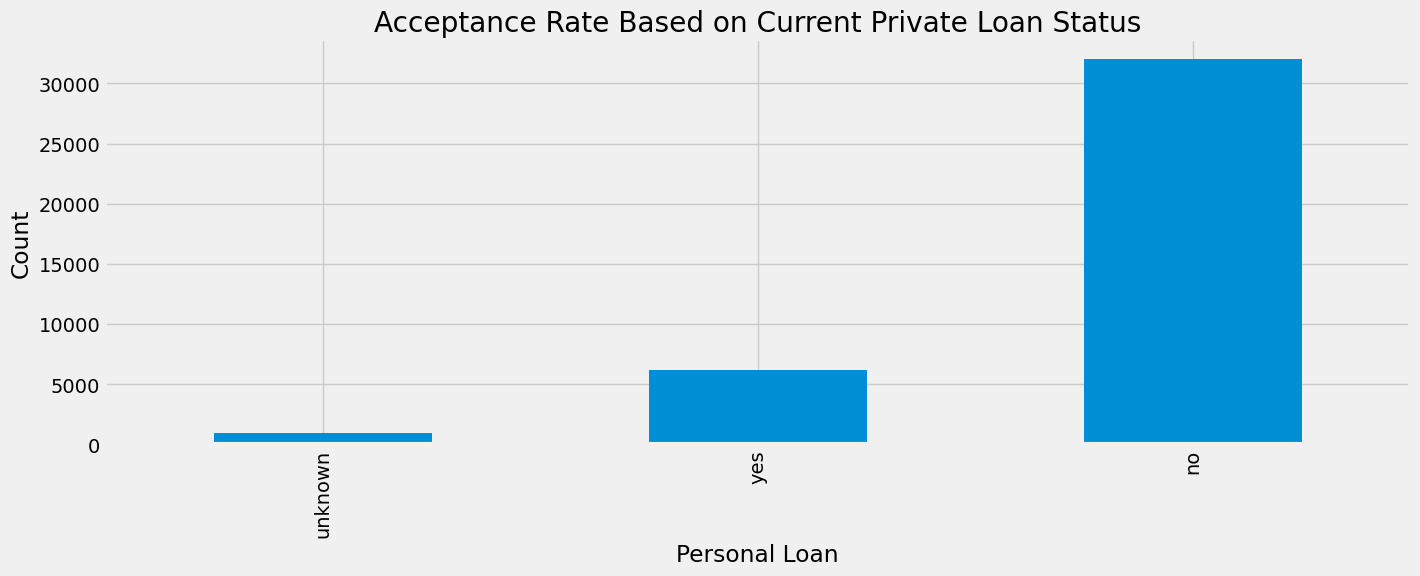

In [ ]:
ax = df.groupby('personal_loan')['subscribed'].count().sort_values().plot(kind = 'bar', figsize = (15,5), title = 'Acceptance Rate for customers with or without personal loan')
ax.set_xlabel('Has Personal Loan (yes/no)')
ax.set_ylabel('Subscription Count');

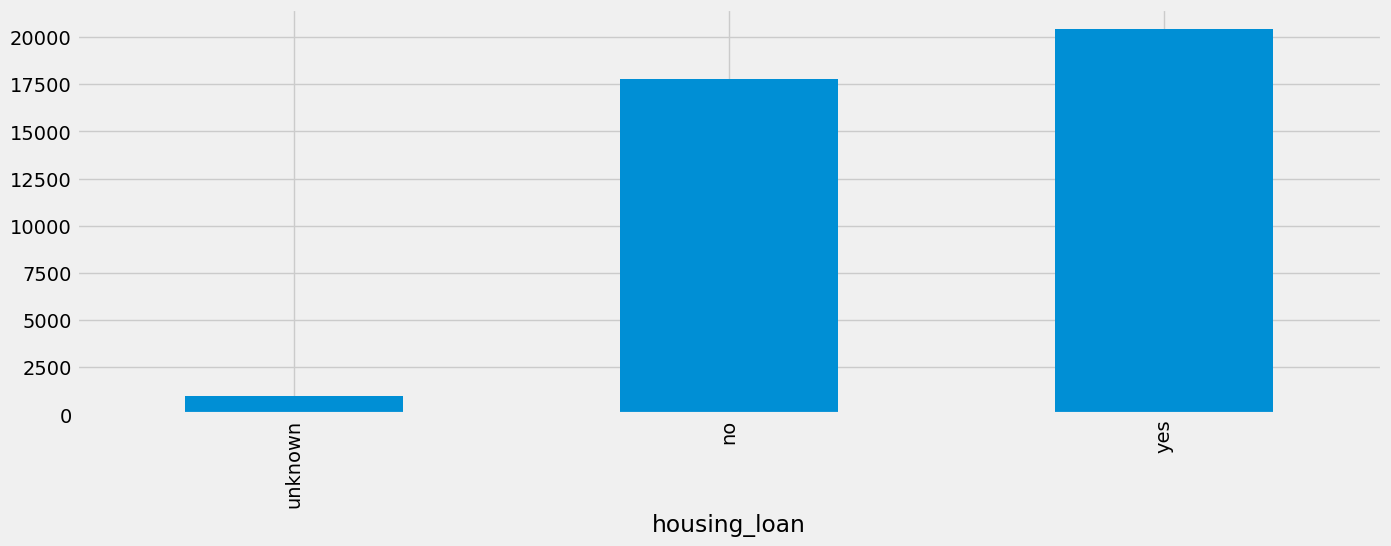

In [102]:
df.groupby('housing_loan')['subscribed'].count().sort_values().plot(kind = 'bar', figsize = (15,5), title = 'Acceptance Rate for customers with or without housing loan');
ax.set_xlabel('Has Housing Loan (yes/no)')
ax.set_ylabel('Subscription Count');

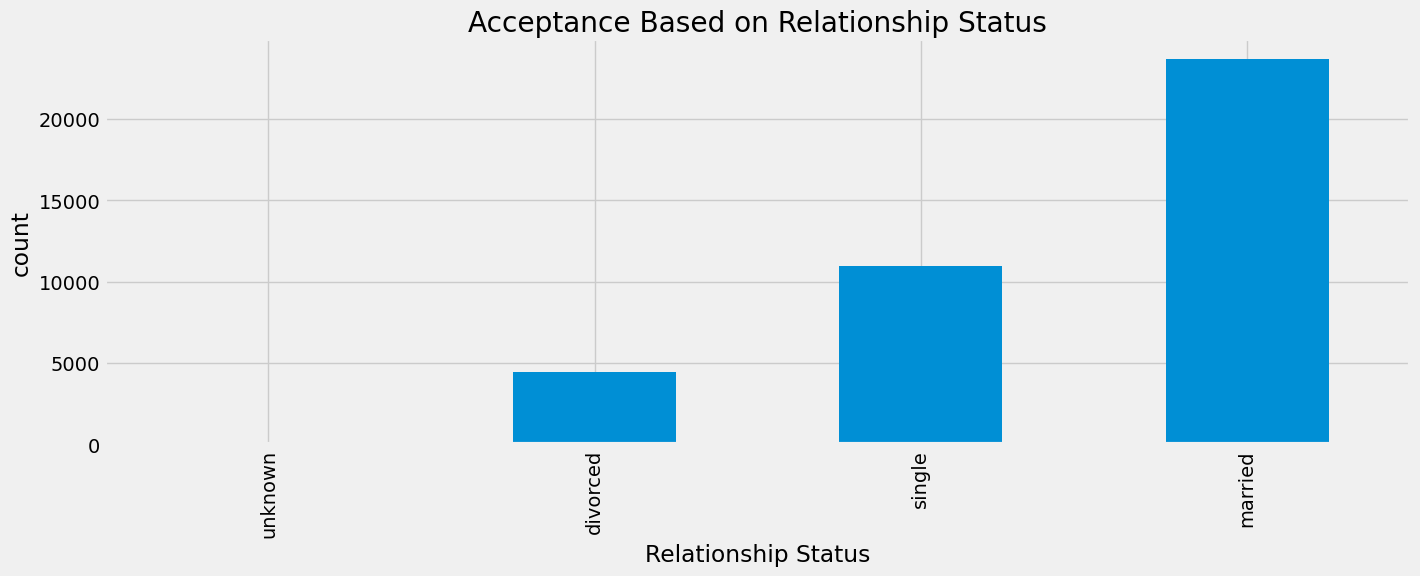

In [103]:
ax = df.groupby('marital')['subscribed'].count().sort_values().plot(kind = 'bar', figsize = (15,5), title = 'Highest Acceptance among Married Customers')
ax.set_xlabel('Relationship Status')
ax.set_ylabel('Subscription Count');

In [114]:
print("Continuous Variables","\n")
continous_vars=df.describe().columns
print(continous_vars)

Continuous Variables 

Index(['age', 'campaign_contacts', 'prior_days_since', 'prior_contacts',
       'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m',
       'nr_employees'],
      dtype='object')


In [115]:
print("Categorical Variables","\n")
categorical_vars=df.describe(include=[object]).columns
print(categorical_vars)

Categorical Variables 

Index(['job', 'marital', 'education', 'housing_loan', 'personal_loan',
       'contact_type', 'month', 'day_of_week', 'prior_outcome', 'subscribed'],
      dtype='object')


Continuous Variables Visualization 



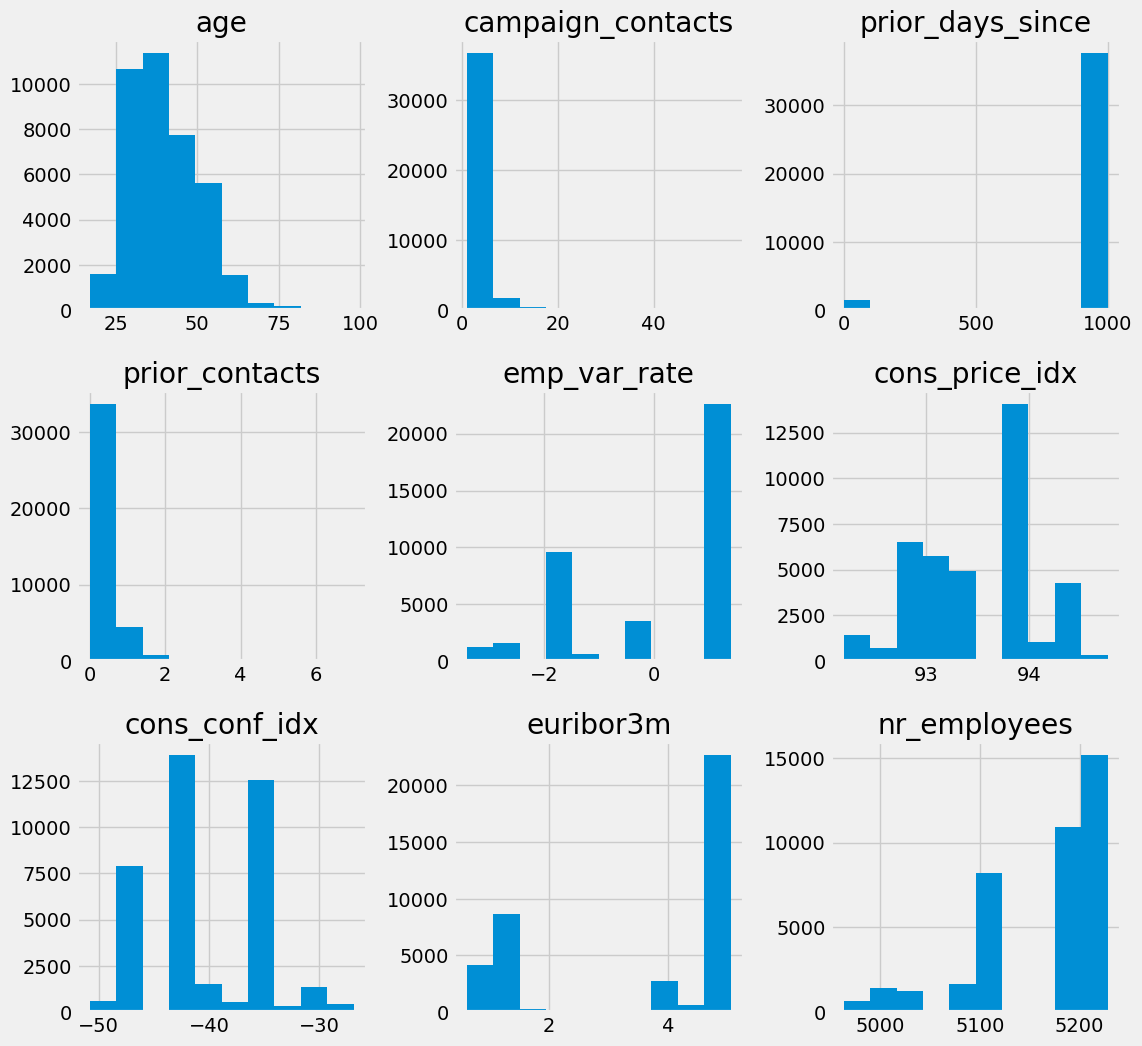

In [123]:
print("Continuous Variables Visualization","\n")
df.hist(column=continous_vars,figsize=(10,10))
plt.show()

Categorical Variables Visualization 



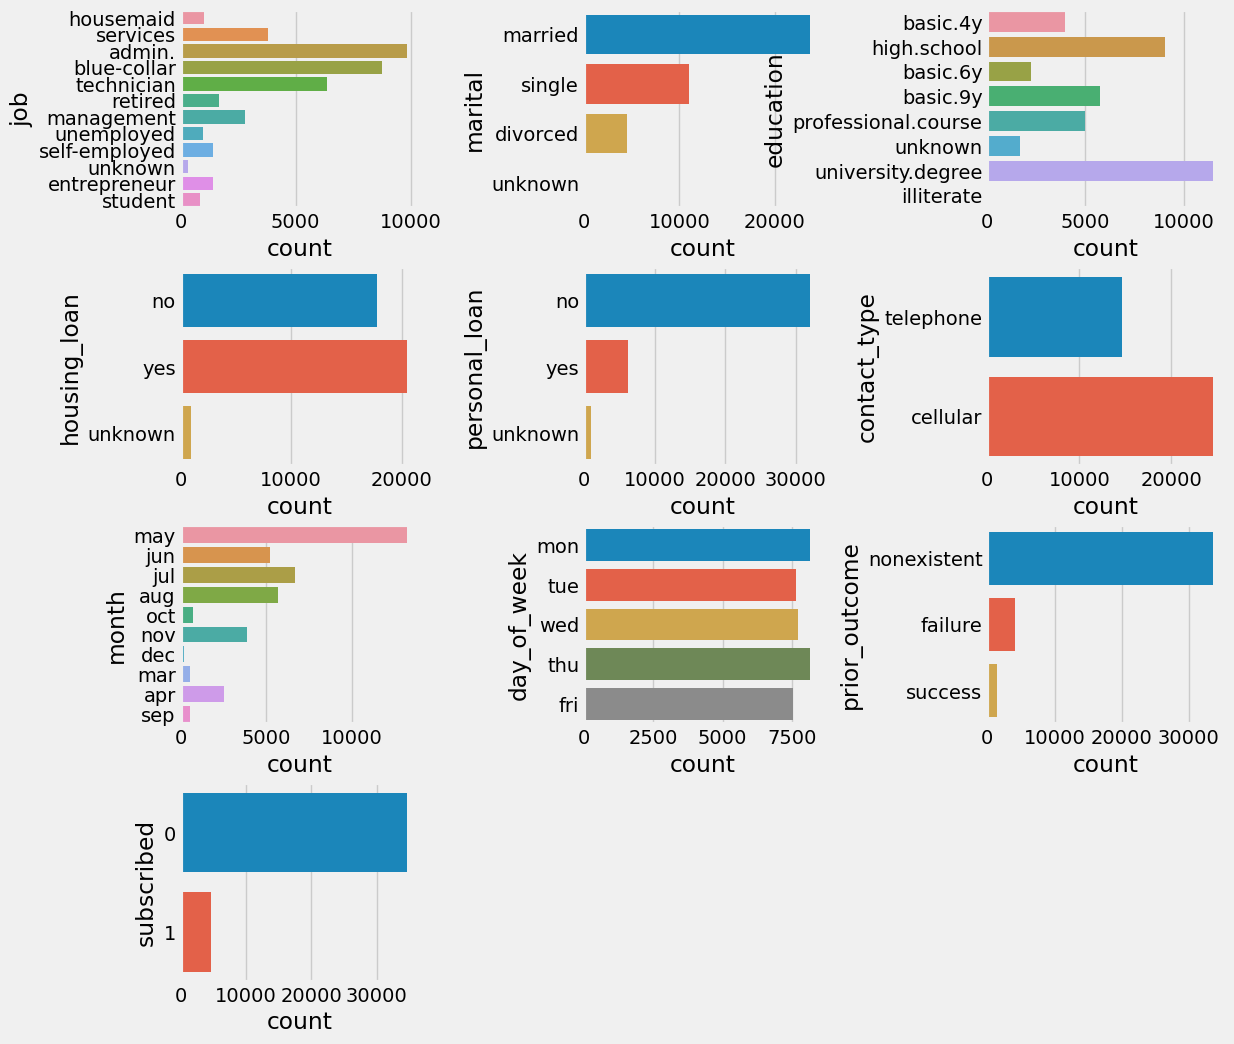

In [333]:
print("Categorical Variables Visualization","\n")
fig, axes = plt.subplots(4, 3, figsize=(12, 12))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.3)
for i, ax in enumerate(axes.ravel()):
    if i > 9:
        ax.set_visible(False)
        continue
    sns.countplot(y = categorical_vars[i], data=df, ax=ax)
plt.show()

**Multi-variate Analysis**

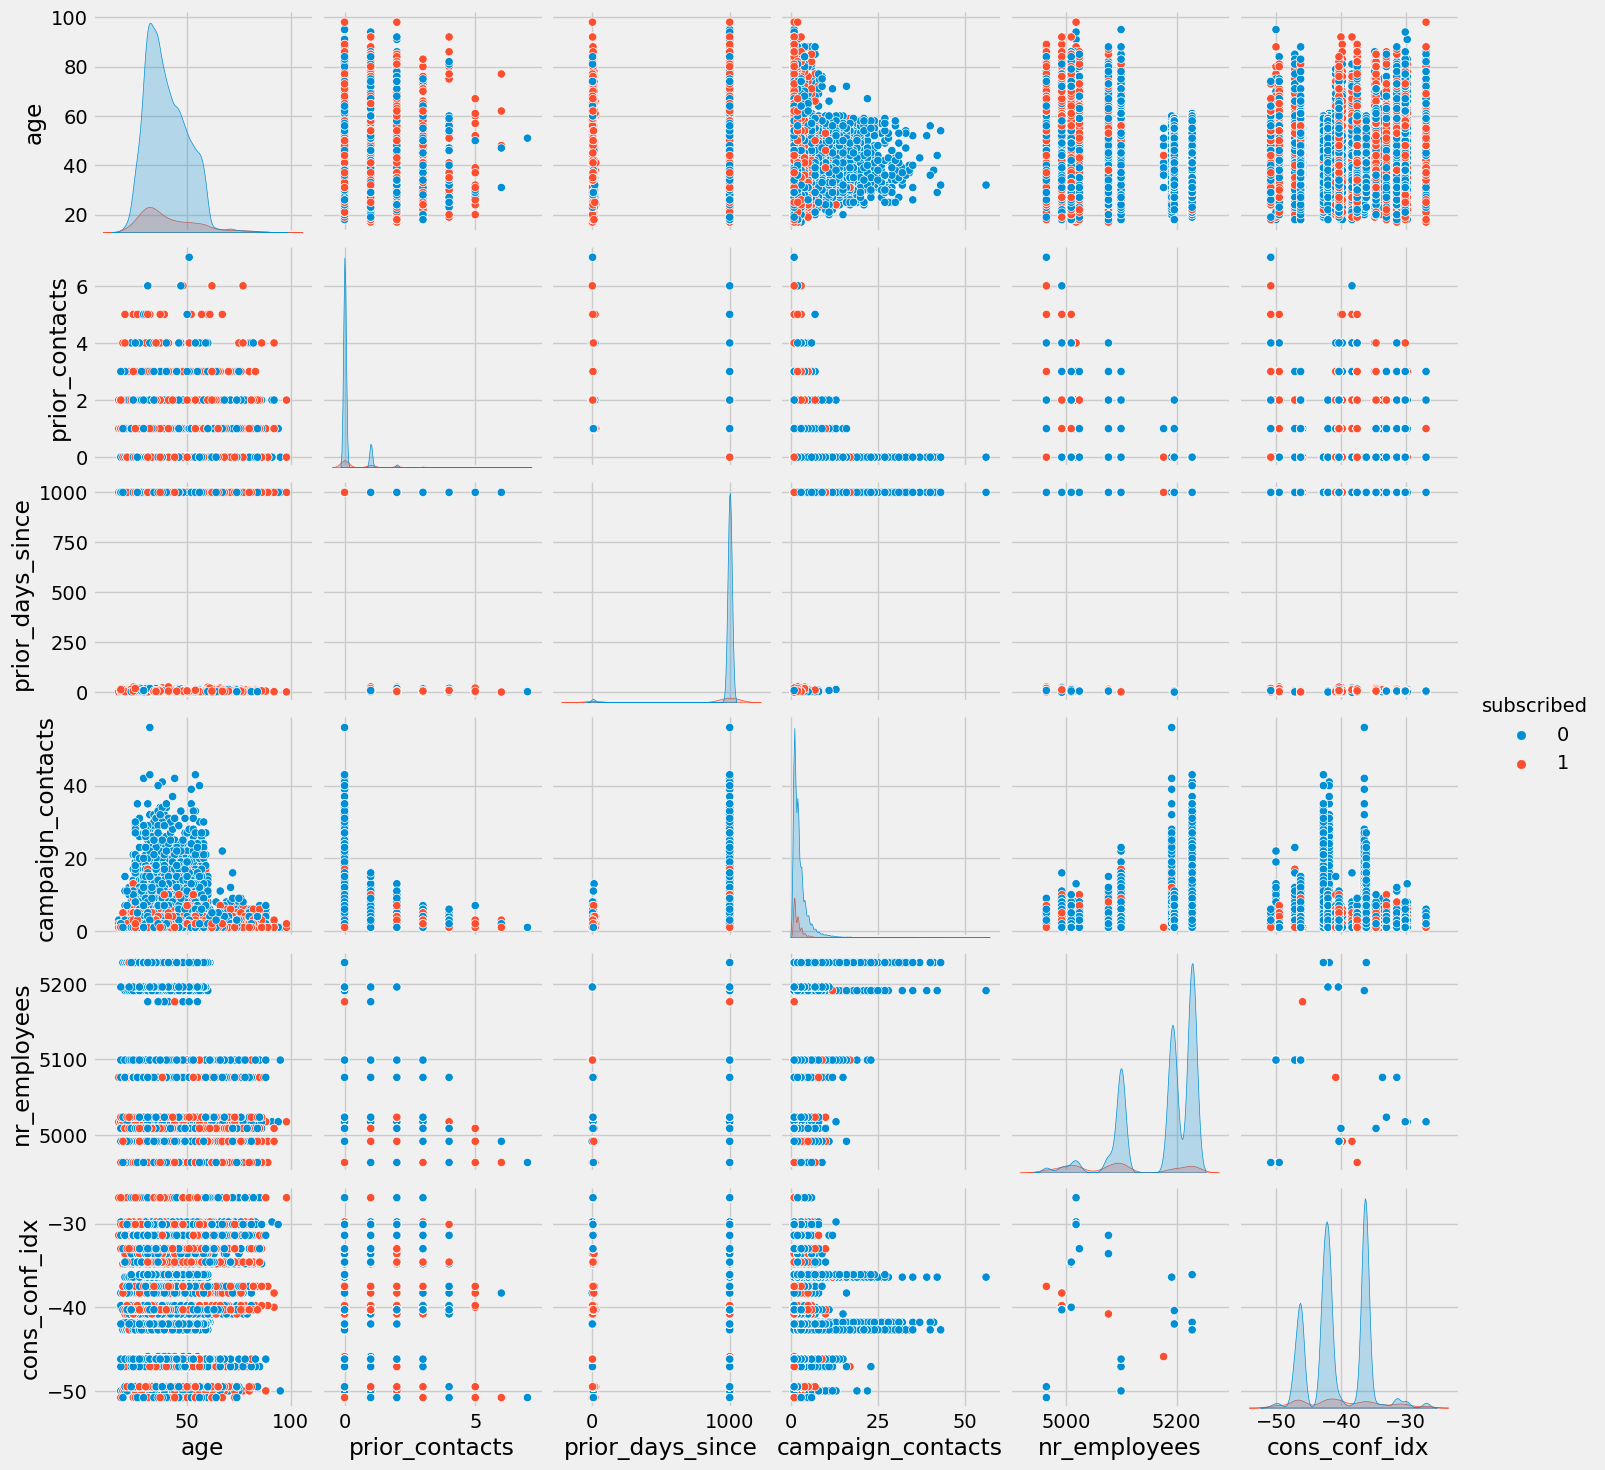

In [194]:
sns.pairplot(df, vars = ['age', 'prior_contacts','prior_days_since', 'campaign_contacts', 'nr_employees', 'cons_conf_idx'], hue='subscribed')
plt.show()

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [130]:
# encoding the target variable here and the rest of the variables after the train, test split.
df['subscribed'] = df['subscribed'].replace({"yes":1, "no" :0})
df['subscribed'] = df['subscribed'].astype('int')
df['subscribed'].value_counts()

subscribed
0    34592
1     4597
Name: count, dtype: int64

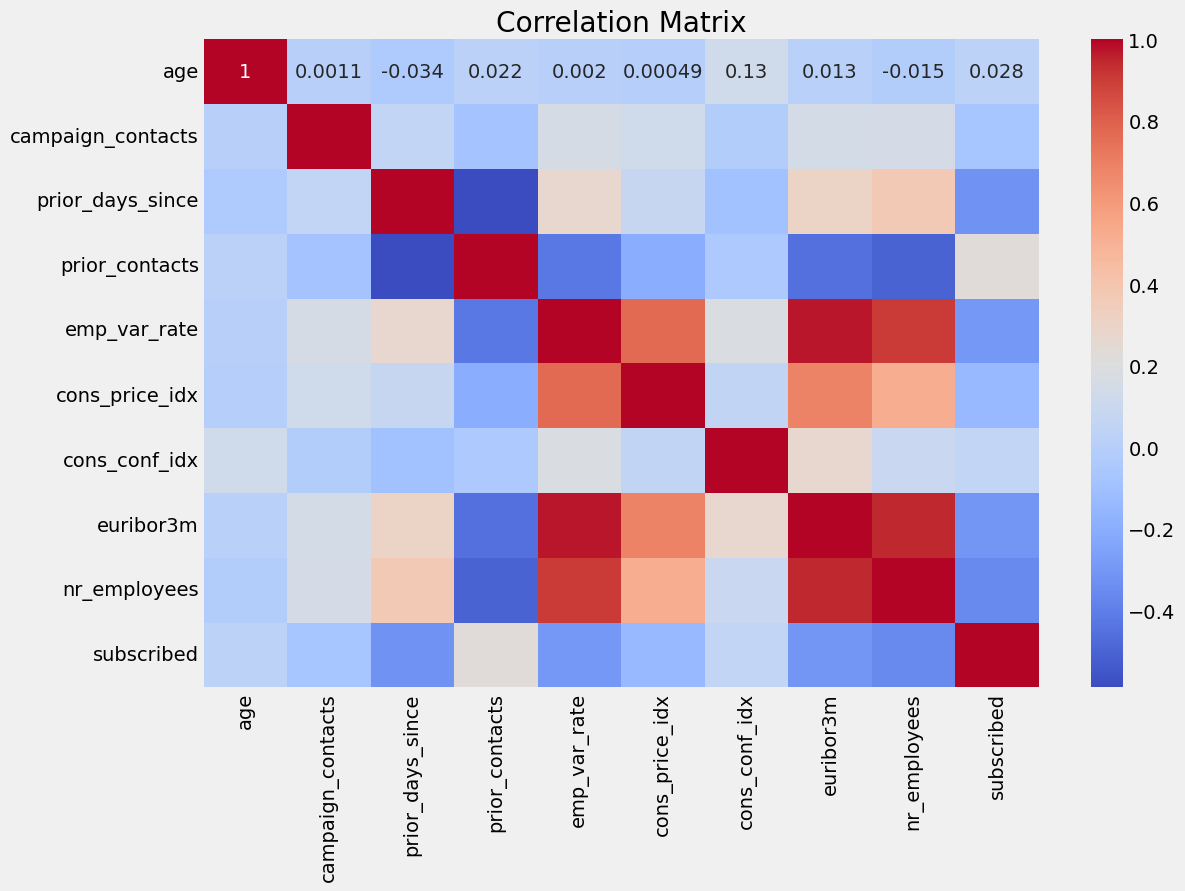

In [148]:
# Compute the correlation matrix for numeric features
numeric_df = df.select_dtypes(include=[float, int])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('images/initial_corr.png')
plt.show()

In [136]:
X = df.drop('subscribed', axis=1)
y = df['subscribed']

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [144]:
# Separating the features and the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print('==================')
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)
display("X_train sample: ", X_train.sample(5))

X_train:  (31351, 18)
y_train:  (31351,)
X_test:  (7838, 18)
y_test:  (7838,)


'X_train sample: '

,age,job,marital,education,housing_loan,personal_loan,contact_type,month,day_of_week,campaign_contacts,prior_days_since,prior_contacts,prior_outcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employees
15069,52,technician,married,professional.course,yes,no,cellular,jul,thu,2,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1
39201,29,admin.,single,high.school,no,no,cellular,mar,mon,4,999,0,nonexistent,-1.8,93.369,-34.8,0.652,5008.7
15750,34,blue-collar,married,basic.6y,yes,yes,cellular,jul,mon,1,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1
931,29,admin.,single,high.school,yes,no,telephone,may,wed,2,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0
12891,34,technician,single,university.degree,no,no,cellular,jul,tue,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1


## Encoding

**One-hot encoding and Scaling**

In [149]:
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test) # to avoid data leakage 

In [150]:
# Get the names of the one-hot encoded columns
onehot_encoded_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

# Combine the numerical and one-hot encoded column names
all_feature_names = np.concatenate([numeric_cols, onehot_encoded_columns])

# Convert to a list for easy handling
all_feature_names = list(all_feature_names)

# Create DataFrames with the processed data and feature names
X_train_processed_df = pd.DataFrame(X_train_processed, columns=all_feature_names)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=all_feature_names)
print("X_train_processed_df shape:", X_train_processed_df.shape)
print("X_test_processed_df shape:", X_test_processed_df.shape)
print("Columns of X_train_processed_df:", X_train_processed_df.columns)
print("Columns of X_test_processed_df:", X_test_processed_df.columns)

X_train_processed_df shape: (31351, 59)
X_test_processed_df shape: (7838, 59)
Columns of X_train_processed_df: Index(['age', 'campaign_contacts', 'prior_days_since', 'prior_contacts',
       'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m',
       'nr_employees', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'housing_loan_no', 'housing_loan_unknown',
       'housing_loan_yes', 'personal_loan_no', 'personal_loan_unknown',
       'personal_loan_yes', 'contact_type_cellular', 'contact_type_telephone

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

### Build a dummy model 

In [163]:
dummy = DummyClassifier(strategy= "most_frequent").fit(X_train_processed_df, y_train)

In [166]:
y_pred_test = dummy.predict(X_test_processed_df)
y_pred_train = dummy.predict(X_train_processed_df)
baseline_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Baseline Test Accuracy: {baseline_accuracy: .2f}')

target_names = ['not subscribed', 'subscribed']
report = classification_report(y_test, y_pred_test, target_names=target_names)
print(report)
# dummy model didn't predict any subscribers (class 1)

Baseline Test Accuracy:  0.88
                precision    recall  f1-score   support

not subscribed       0.88      1.00      0.94      6919
    subscribed       0.00      0.00      0.00       919

      accuracy                           0.88      7838
     macro avg       0.44      0.50      0.47      7838
  weighted avg       0.78      0.88      0.83      7838



In [167]:
y_train.value_counts(normalize=True)

subscribed
0    0.882683
1    0.117317
Name: proportion, dtype: float64

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [168]:
logreg = LogisticRegression().fit(X_train_processed_df, y_train)

### Problem 9: Score the Model

What is the accuracy of your model?

In [335]:
# Evaluate the model
logreg_train_accuracy = logreg.score(X_train_processed_df, y_train)
logreg_test_accuracy = logreg.score(X_test_processed_df, y_test)
y_preds_test_log = logreg.predict(X_test_processed_df)
y_preds_train_log = logreg.predict(X_train_processed_df)
print(f'Logistic Regression train accuracy: {logreg_train_accuracy: .2f}')
print(f'Logistic Regression test accuracy: {logreg_test_accuracy: .2f}')
precision_test = precision_score(y_test, y_preds_test_log)
precision_train = precision_score(y_train, y_preds_train_log)
recall = recall_score(y_test, y_preds_test_log)
print(f'Precision Test score: {precision_test: .2f}\nPrecision train score: {precision_train: .2f}\nRecall: {recall: .2f}')

Logistic Regression train accuracy:  0.90
Logistic Regression test accuracy:  0.90
Precision Test score:  0.70
Precision train score:  0.67
Recall:  0.25


In [171]:
report = classification_report(y_test, y_preds_test_log, target_names=target_names)
print(report)

                precision    recall  f1-score   support

not subscribed       0.91      0.99      0.95      6919
    subscribed       0.70      0.25      0.37       919

      accuracy                           0.90      7838
     macro avg       0.80      0.62      0.66      7838
  weighted avg       0.88      0.90      0.88      7838



### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [173]:
# Build and score models with default settings 
models = {
    'Logistic Regression': LogisticRegression(random_state = 42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state = 42),
    'SVM': SVC(random_state = 42)
}
results = []

In [174]:
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train_processed_df, y_train)
    train_time = time.time() - start_time
    train_acc = model.score(X_train_processed_df, y_train)
    test_acc = model.score(X_test_processed_df, y_test)
    y_pred_train = model.predict(X_train_processed_df)
    y_pred_test = model.predict(X_test_processed_df)
    precision_train = precision_score(y_train, y_pred_train)
    precision_test = precision_score(y_test, y_pred_test)
    results.append([name, train_time, train_acc, test_acc, precision_train, precision_test])

In [180]:
results_df = pd.DataFrame(results, columns=['Model', 'Train Time (s)', 'Train Accuracy', 'Test Accuracy', 'Train Precision', 'Test Precision'])
display(results_df)

,Model,Train Time (s),Train Accuracy,Test Accuracy,Train Precision,Test Precision
0,Logistic Regression,0.129234,0.895857,0.899337,0.667750,0.695783
1,KNN,0.001277,0.907658,0.885940,0.696241,0.524085
2,Decision Tree,0.137870,0.994514,0.829421,1.000000,0.291417
3,SVM,39.439769,0.900673,0.897933,0.694483,0.655352


<Figure size 1000x600 with 0 Axes>

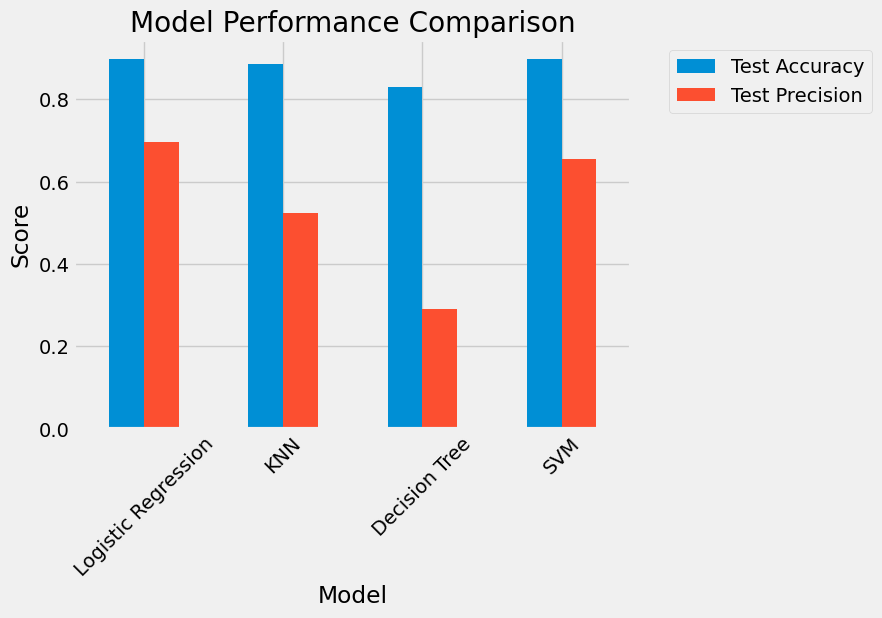

In [266]:
plt.figure(figsize=(10, 6))
results_df.set_index('Model')[['Test Accuracy', 'Test Precision']].plot(kind='bar')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc=2, bbox_to_anchor=(1.05, 1))
plt.show()

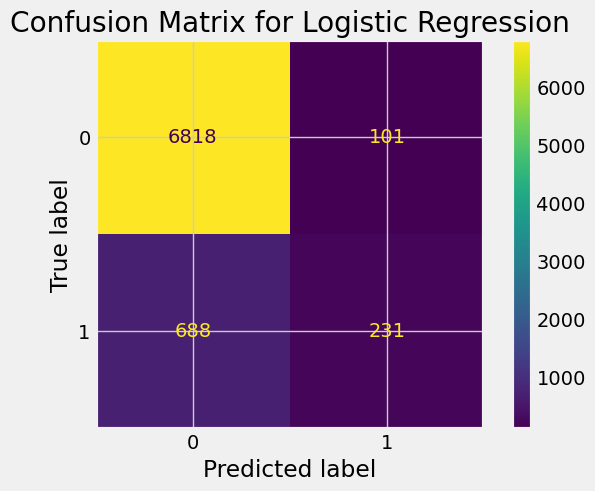

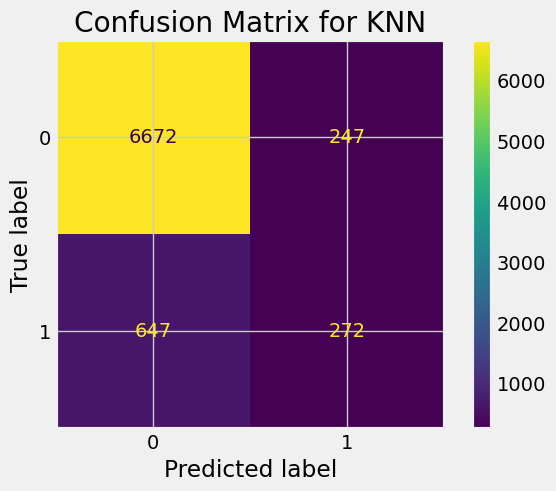

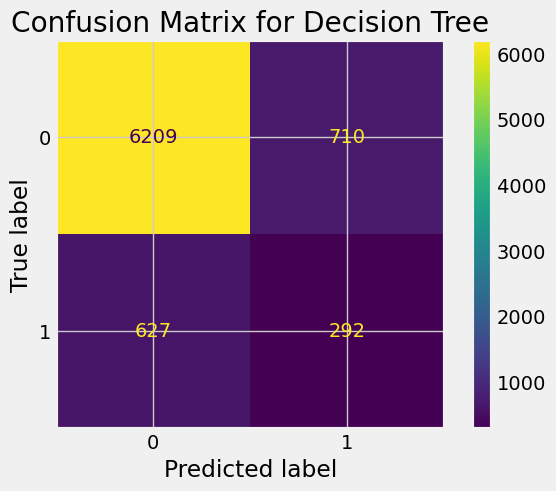

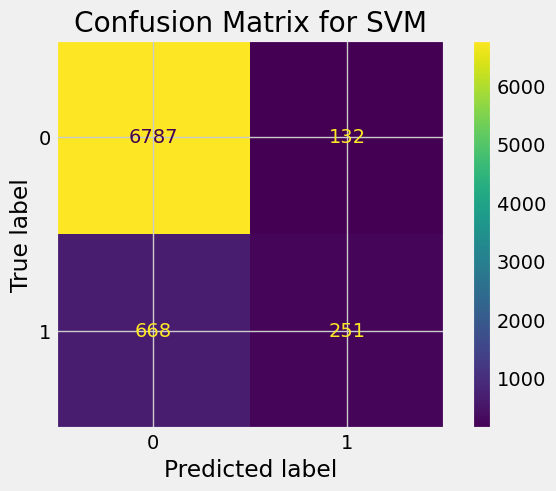

In [179]:
# Plot confusion matrix for each model
for name, model in models.items():
    y_pred_test = model.predict(X_test_processed_df)
    cm = confusion_matrix(y_test, y_pred_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Confusion Matrix for {name}')
    plt.show()


**Logistic Regression**
- TN (6818): Correctly predicted negatives.
- FP (101): Incorrectly predicted positives.
- FN (688): Incorrectly predicted negatives.
- TP (231): Correctly predicted positives.

The model has high true negatives, meaning it correctly identifies the majority of negative cases.
It has a reasonable number of false negatives and false positives, indicating areas for improvement.

**KNN**
- TN (6672): Correctly predicted negatives.
- FP (247): Incorrectly predicted positives.
- FN (647): Incorrectly predicted negatives.
- TP (272): Correctly predicted positives.

Similar to Logistic Regression, but with slightly more false positives and fewer false negatives.

**Decision Tree**
- TN (6209): Correctly predicted negatives.
- FP (710): Incorrectly predicted positives.
- FN (627): Incorrectly predicted negatives.
- TP (292): Correctly predicted positives.

The Decision Tree has more false positives compared to other models, which may indicate overfitting.

**SVM**
- TN (6787): Correctly predicted negatives.
- FP (132): Incorrectly predicted positives.
- FN (668): Incorrectly predicted negatives.
- TP (251): Correctly predicted positives.

The SVM model performs well with low false positives and a reasonable balance of true positives and false negatives.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [204]:
# since SVM is computationally expensive, we will perform the grid search 
# on a smaller subset of our dataset provided in bank-additional.csv
# after we have gathered the best hyperparameter values, we will train the model on the full dataset
df_small = pd.read_csv('data/bank-additional.csv', sep = ';')
df_small = df_small.drop_duplicates()
df_small['y'] = df_small['y'].replace({"yes":1, "no" :0})
df_small['y'] = df_small['y'].astype('int')
df_small = df_small.drop(['duration', 'default'], axis=1)
df_small = df_small.rename(columns={'emp.var.rate': 'emp_var_rate', 'cons.price.idx': 'cons_price_idx', 'cons.conf.idx': 'cons_conf_idx', 'nr.employed': 'nr_employees'})
df_small = df_small.rename(columns={'housing': 'housing_loan', 'loan': 'personal_loan','contact': 'contact_type','campaign': 'campaign_contacts', 'previous': 'prior_contacts',
    'pdays': 'prior_days_since', 'poutcome': 'prior_outcome', 'y': 'subscribed'})

# Split into features and target
X_small = df_small.drop('subscribed', axis=1)
y_small = df_small['subscribed']
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X_small, y_small, test_size = 0.2, random_state = 42, stratify=y_small)
X_train_small_processed = preprocessor.fit_transform(X_train_small)
X_test_small_processed = preprocessor.transform(X_test_small)


In [205]:
print(X_train_small_processed.shape)
print(X_test_small_processed.shape)
print(y_train_small.shape)
print(y_test_small.shape)
X_train_small.sample(5)

(3295, 59)
(824, 59)
(3295,)
(824,)


,age,job,marital,education,housing_loan,personal_loan,contact_type,month,day_of_week,campaign_contacts,prior_days_since,prior_contacts,prior_outcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employees
2282,25,admin.,single,university.degree,no,no,telephone,aug,tue,3,999,0,nonexistent,-2.9,92.201,-31.4,0.838,5076.2
3604,31,admin.,single,university.degree,yes,no,cellular,may,mon,1,999,0,nonexistent,-1.8,92.893,-46.2,1.354,5099.1
2437,39,technician,married,high.school,no,no,cellular,aug,mon,2,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1
2040,33,technician,single,professional.course,yes,no,cellular,aug,mon,4,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
1327,40,technician,single,high.school,no,no,cellular,aug,fri,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1


In [203]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],       
    'penalty': ['l1', 'l2', 'None'],  
    'solver': ['liblinear', 'newton-cg', 'lbfgs'] 
}
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}
models_param_grids = {
    'Logistic Regression': (LogisticRegression(random_state=42), param_grid_lr),
    'KNN': (KNeighborsClassifier(), param_grid_knn),
    'Decision Tree': (DecisionTreeClassifier(random_state=42), param_grid_dt),
    'SVM': (SVC(random_state=42, probability=True), param_grid_svm)
}
grid_search_results = []

In [206]:
# Perform grid search for each model, optimizing for precision 
# since we are dealing with an imbalanced dataset and want to find out who will subscribe
for name, (model, param_grid) in tqdm(models_param_grids.items(), desc="Model Grid Search", total=len(models_param_grids)):
    print(f"Starting grid search for {name}")
    if name == 'SVM':
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='precision', n_jobs=-1, verbose=3)
        grid_search.fit(X_train_small_processed, y_train_small)
    else:
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='precision', n_jobs=-1)
        grid_search.fit(X_train_processed_df, y_train)
    
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    grid_search_results.append([name, best_params, best_score])
    print(f"Finished grid search for {name}")
    print(f"Best parameters for {name}: {best_params}")
    print(f"Best cross-validation score for {name}: {best_score}")

Model Grid Search:   0%|          | 0/4 [00:00<?, ?it/s]

Starting grid search for Logistic Regression


Model Grid Search:  25%|██▌       | 1/4 [00:06<00:20,  6.96s/it]

Finished grid search for Logistic Regression
Best parameters for Logistic Regression: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score for Logistic Regression: 0.6905784887894979
Starting grid search for KNN


Model Grid Search:  50%|█████     | 2/4 [00:23<00:25, 12.56s/it]

Finished grid search for KNN
Best parameters for KNN: {'n_neighbors': 11, 'p': 2, 'weights': 'uniform'}
Best cross-validation score for KNN: 0.5893390595079129
Starting grid search for Decision Tree


Model Grid Search:  75%|███████▌  | 3/4 [00:24<00:07,  7.37s/it]

Finished grid search for Decision Tree
Best parameters for Decision Tree: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2}
Best cross-validation score for Decision Tree: 0.621315800374772
Starting grid search for SVM
Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 2/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.647 total time=   0.5s
[CV 4/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.739 total time=   0.5s
[CV 1/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.571 total time=   0.5s
[CV 4/5] END C=0.1, gamma=scale, kernel=sigmoid;, score=0.462 total time=   0.6s
[CV 5/5] END C=0.1, gamma=scale, kernel=sigmoid;, score=0.167 total time=   0.6s
[CV 2/5] END C=0.1, gamma=scale, kernel=sigmoid;, score=0.286 total time=   0.6s
[CV 3/5] END C=0.1, gamma=scale, kernel=sigmoid;, score=0.375 total time=   0.6s
[CV 5/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.619 total time=   0.7s
[CV 1/5] END C=0.1, gamma=scale, 

/Users/matildaorona/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/matildaorona/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/matildaorona/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV 1/5] END .C=0.1, gamma=auto, kernel=sigmoid;, score=0.000 total time=   0.7s
[CV 2/5] END .C=0.1, gamma=auto, kernel=sigmoid;, score=0.000 total time=   0.5s
[CV 1/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.556 total time=   1.5s
[CV 3/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.586 total time=   1.5s
[CV 4/5] END .C=0.1, gamma=auto, kernel=sigmoid;, score=0.000 total time=   0.5s
[CV 3/5] END .C=0.1, gamma=auto, kernel=sigmoid;, score=0.000 total time=   0.5s
[CV 5/5] END .C=0.1, gamma=auto, kernel=sigmoid;, score=0.000 total time=   0.6s
[CV 3/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.586 total time=   1.1s
[CV 5/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.615 total time=   1.0s
[CV 2/5] END ..C=1, gamma=scale, kernel=sigmoid;, score=0.196 total time=   0.4s
[CV 3/5] END ..C=1, gamma=scale, kernel=sigmoid;, score=0.233 total time=   0.4s
[CV 1/5] END .....C=1, gamma=scale, kernel=poly;, score=0.526 total time=   0.5s
[CV 4/5] END .....C=1, gamma

Model Grid Search: 100%|██████████| 4/4 [29:05<00:00, 436.25s/it]

Finished grid search for SVM
Best parameters for SVM: {'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}
Best cross-validation score for SVM: 0.7386904761904762


In [207]:
grid_search_results_df = pd.DataFrame(grid_search_results, columns=['Model', 'Best Parameters', 'Best CV Score'])

# Train final models with the best parameters and evaluate
final_results = []
feature_importance_dict = {}
classification_reports = {}

for name, (model, param_grid) in tqdm(models_param_grids.items(), desc="Training Final Models", total=len(models_param_grids)):
    best_params = grid_search_results_df.loc[grid_search_results_df['Model'] == name, 'Best Parameters'].values[0]
    model.set_params(**best_params)

    start_time = time.time()
    model.fit(X_train_processed_df, y_train)
    train_time = time.time() - start_time
    
    train_acc = model.score(X_train_processed_df, y_train)
    test_acc = model.score(X_test_processed_df, y_test)
    y_pred_train = model.predict(X_train_processed_df)
    y_pred_test = model.predict(X_test_processed_df)
    precision_train = precision_score(y_train, y_pred_train)
    precision_test = precision_score(y_test, y_pred_test)
    
    final_results.append([name, best_params, train_time, train_acc, test_acc, precision_train, precision_test])
    print(f"Finished training and evaluation for {name}")

Training Final Models:  25%|██▌       | 1/4 [00:00<00:00,  8.43it/s]

Finished training and evaluation for Logistic Regression


Training Final Models:  50%|█████     | 2/4 [13:49<16:15, 487.77s/it]

Finished training and evaluation for KNN
Finished training and evaluation for Decision Tree


Training Final Models: 100%|██████████| 4/4 [14:55<00:00, 223.87s/it]

Finished training and evaluation for SVM


In [216]:
final_results_df = pd.DataFrame(final_results, columns=['Model', 'Best Parameters', 'Train Time', 'Train Accuracy', 'Test Accuracy', 'Train Precision', 'Test Precision'])
print('Final Model Results\n') 
final_results_df

Model Results after Grid Search



,Model,Best Parameters,Train Time,Train Accuracy,Test Accuracy,Train Precision,Test Precision
0,Logistic Regression,"{'C': 0.01, 'penalty': 'l2', 'solver': 'liblin...",0.045924,0.896080,0.899719,0.689189,0.722408
1,KNN,"{'n_neighbors': 11, 'p': 2, 'weights': 'uniform'}",0.003624,0.900928,0.893085,0.672497,0.593103
2,Decision Tree,"{'max_depth': 10, 'max_features': 'log2', 'min...",0.011317,0.902906,0.893085,0.713612,0.602532
3,SVM,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}",50.877737,0.894963,0.898061,0.695035,0.727273


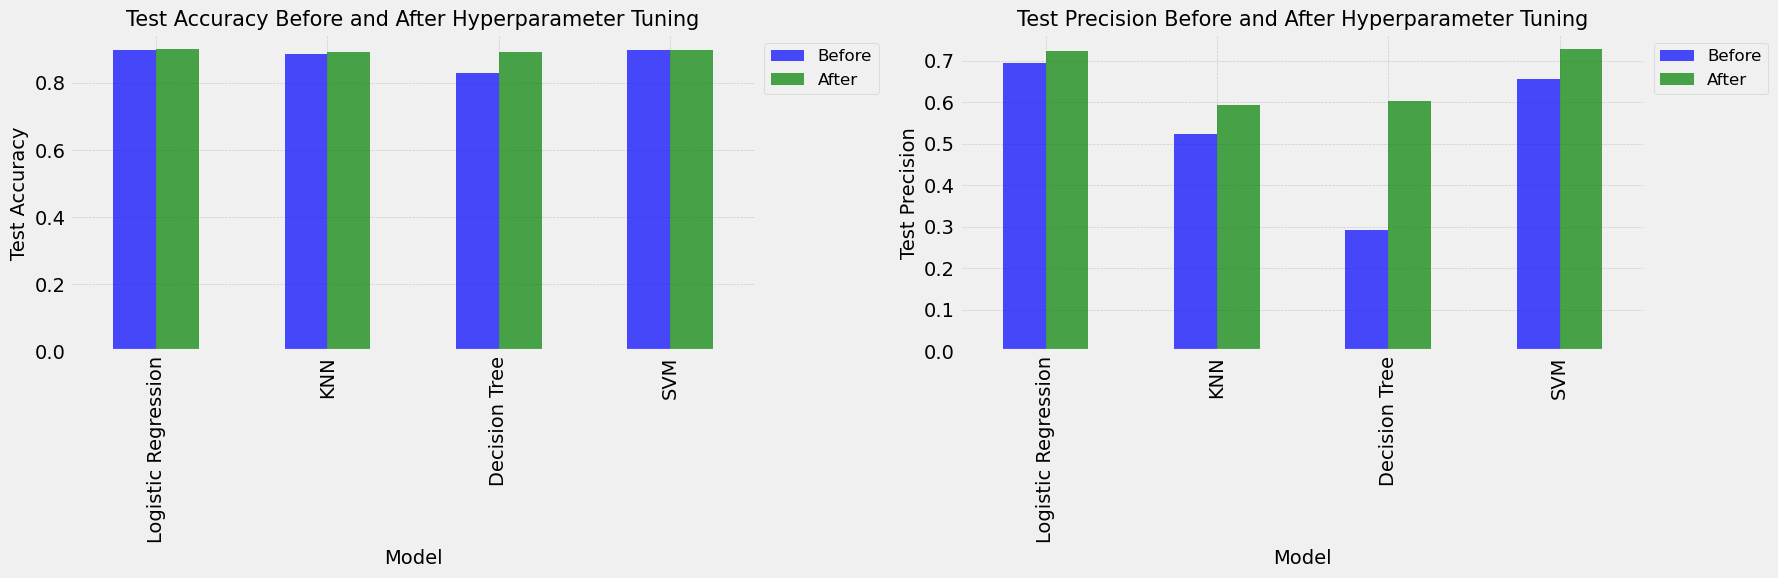

In [312]:
comparison_df = pd.merge(results_df[['Model', 'Train Accuracy', 'Test Accuracy', 'Train Precision', 'Test Precision']],
                         final_results_df[['Model', 'Train Accuracy', 'Test Accuracy', 'Train Precision', 'Test Precision']],
                         on='Model', suffixes=('_Before', '_After'))

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
comparison_df.plot(x='Model', y=['Test Accuracy_Before', 'Test Accuracy_After'], kind='bar', ax=axes[0], color=['blue', 'green'], alpha=0.7)
axes[0].set_title('Test Accuracy Before and After Hyperparameter Tuning', fontsize = 15)
axes[0].set_ylabel('Test Accuracy', fontsize = 14)
axes[0].set_xlabel('Model', fontsize=14)
axes[0].legend(['Before', 'After'],loc='best', bbox_to_anchor=(1, 1), fontsize=12)
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)

comparison_df.plot(x='Model', y=['Test Precision_Before', 'Test Precision_After'], kind='bar', ax=axes[1], color=['blue', 'green'], alpha=0.7)
axes[1].set_title('Test Precision Before and After Hyperparameter Tuning', fontsize = 15)
axes[1].set_ylabel('Test Precision', fontsize = 14)
axes[1].set_xlabel('Model', fontsize=14)
axes[1].legend(['Before', 'After'],loc='best', bbox_to_anchor=(1, 1), fontsize=12)
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('model_performance_comparison.png')
plt.show()

Plotting ROC Curves: 100%|██████████| 4/4 [02:56<00:00, 44.19s/it]


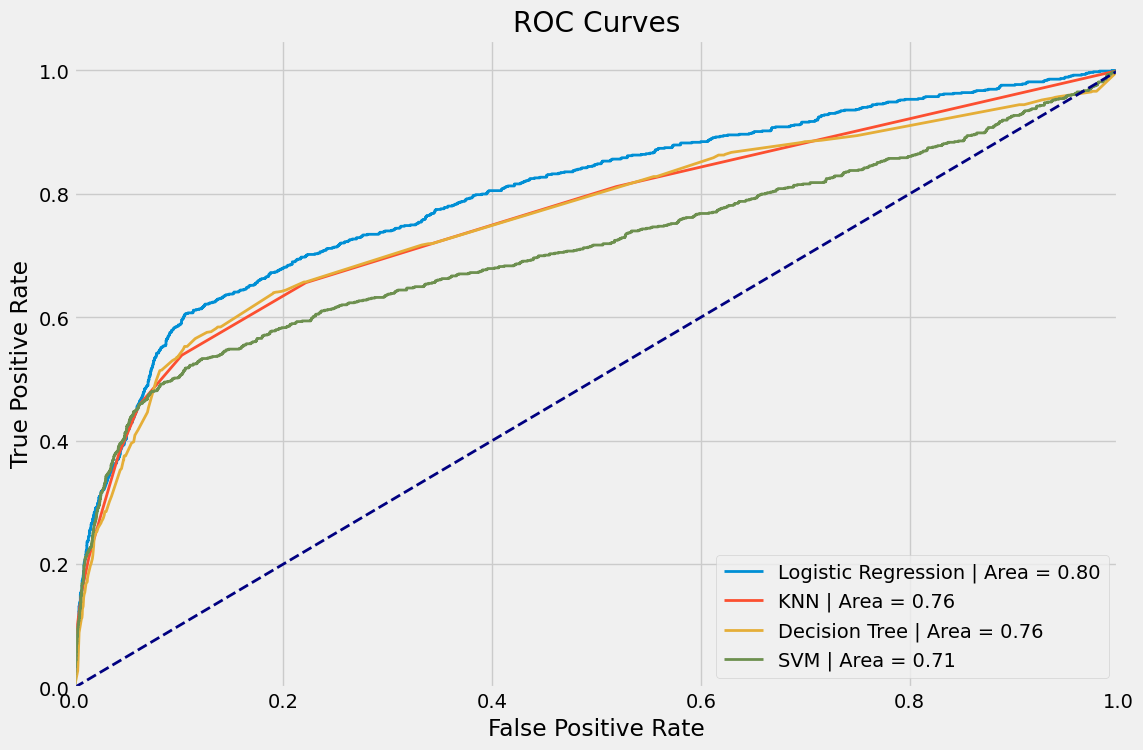

In [337]:
plt.figure(figsize=(12, 8))
for name, (model, param_grid) in tqdm(models_param_grids.items(), desc="Plotting ROC Curves", total=len(models_param_grids)):
    best_params = grid_search_results_df.loc[grid_search_results_df['Model'] == name, 'Best Parameters'].values[0]
    model.set_params(**best_params)
    model.fit(X_train_processed_df, y_train)
    
    if isinstance(model, SVC): # Ensure SVM has probability=True for predict_proba
        model.probability = True
        model.fit(X_train_processed_df, y_train)
    y_pred_prob = model.predict_proba(X_test_processed_df)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} | Area = {roc_auc:.2f}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.savefig('roc_curves.png') 
plt.show()

Plotting Feature Importances:   0%|          | 0/4 [00:00<?, ?it/s]

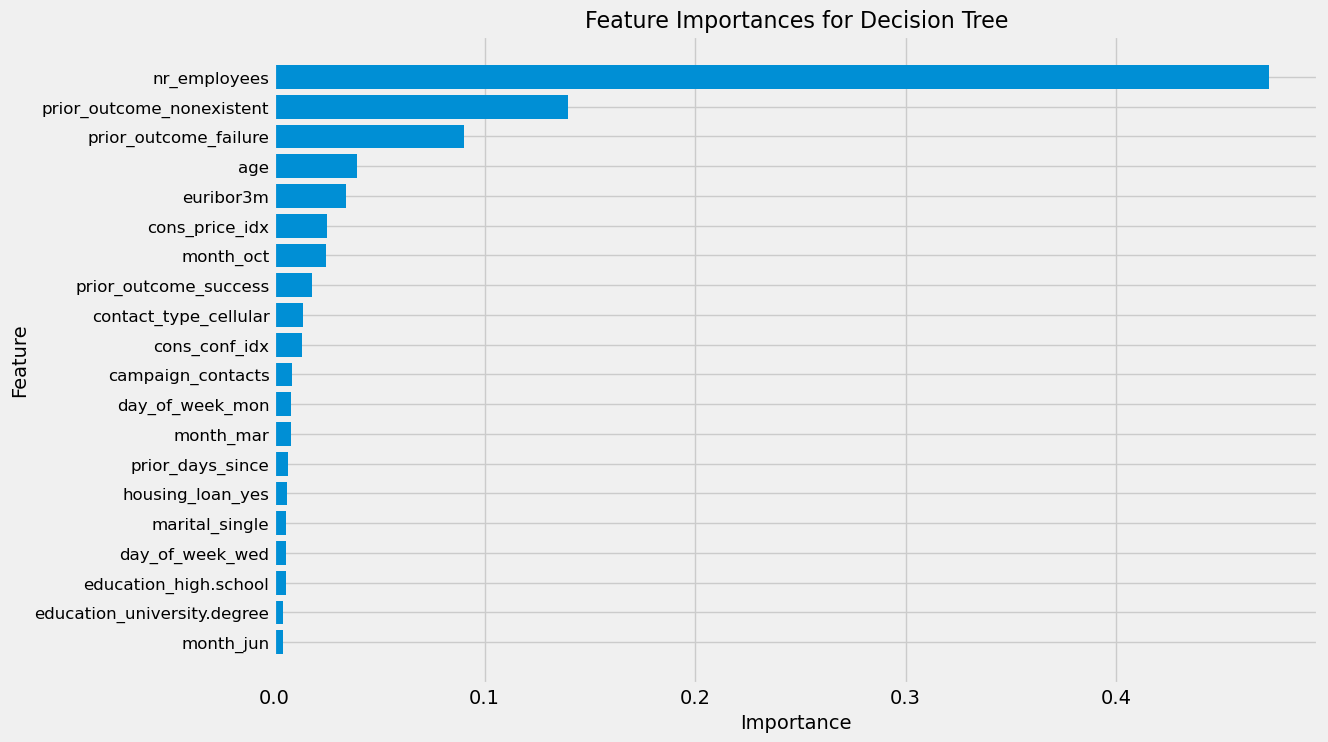

Plotting Feature Importances: 100%|██████████| 4/4 [00:00<00:00, 26.15it/s]


In [338]:
for name, (model, param_grid) in tqdm(models_param_grids.items(), desc="Plotting Feature Importances", total=len(models_param_grids)):
    if hasattr(model, 'feature_importances_'):
        best_params = grid_search_results_df.loc[grid_search_results_df['Model'] == name, 'Best Parameters'].values[0]
        model.set_params(**best_params)
        model.fit(X_train_processed_df, y_train)
        importances = model.feature_importances_
        plt.figure(figsize=(12, 8))
        sorted_idx = np.argsort(importances)
        top_n = 20  # Show top 20 features
        sorted_idx = sorted_idx[-top_n:]
        plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
        plt.yticks(range(len(sorted_idx)), [all_feature_names[i] for i in sorted_idx], fontsize=12)
        plt.xlabel('Importance', fontsize=14)
        plt.ylabel('Feature', fontsize=14)
        plt.title(f'Feature Importances for {name}', fontsize=16)
        plt.savefig(f'feature_importances_{name}.png')
        plt.show()

* Since we are using a polynomial kernel for the SVM model, we will not be able to extract feature importances from it.

Plotting Confusion Matrices:   0%|          | 0/4 [00:00<?, ?it/s]

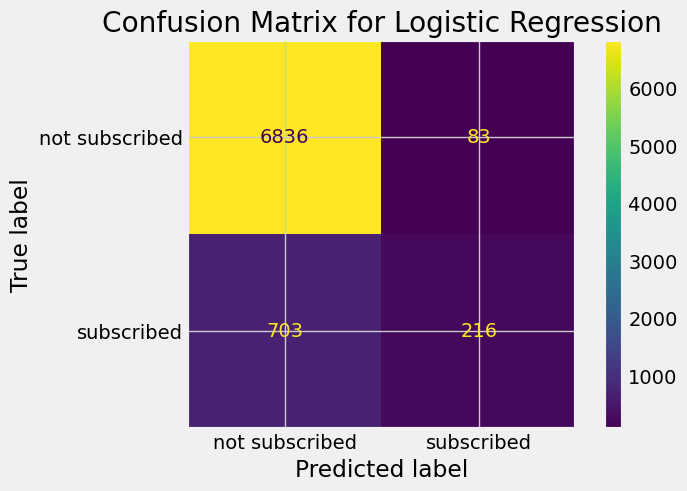

Plotting Confusion Matrices:  25%|██▌       | 1/4 [00:00<00:00,  8.11it/s]

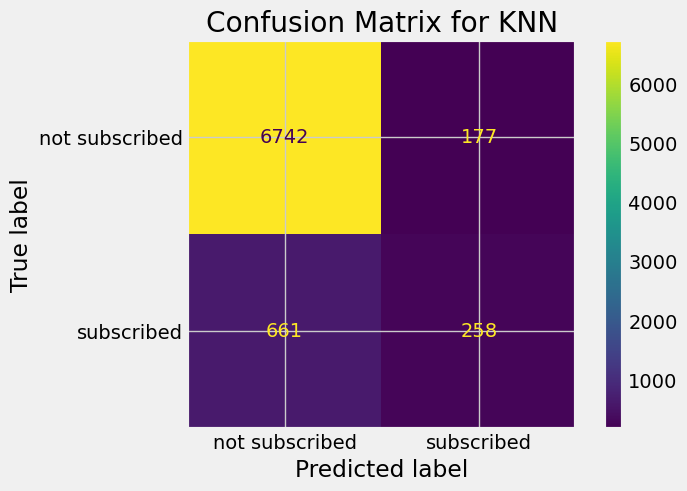

Plotting Confusion Matrices:  50%|█████     | 2/4 [01:26<01:41, 50.63s/it]

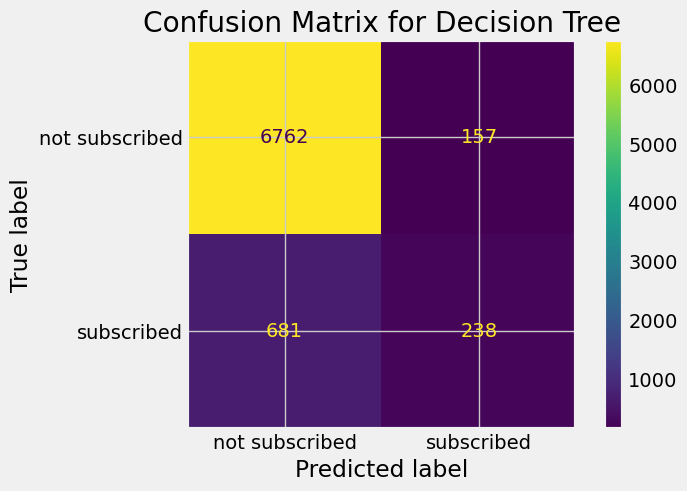

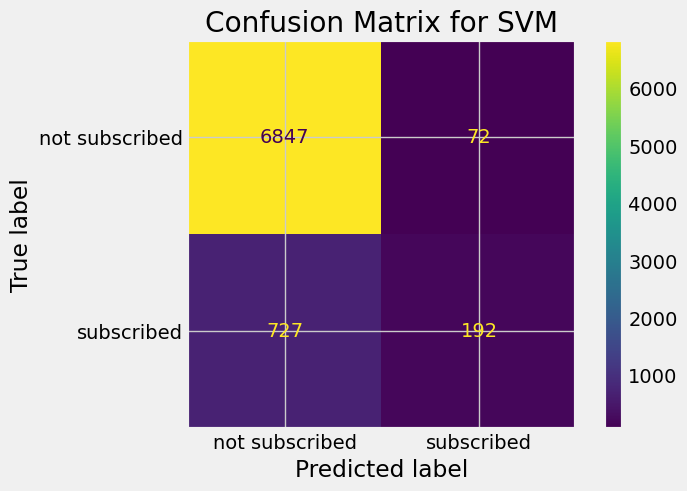

Plotting Confusion Matrices: 100%|██████████| 4/4 [02:22<00:00, 35.58s/it]


In [251]:
# Plot confusion matrices for final models
for name, (model, param_grid) in tqdm(models_param_grids.items(), desc="Plotting Confusion Matrices", total=len(models_param_grids)):
    best_params = grid_search_results_df.loc[grid_search_results_df['Model'] == name, 'Best Parameters'].values[0]
    model.set_params(**best_params)
    model.fit(X_train_processed_df, y_train)
    y_pred_test = model.predict(X_test_processed_df)
    cm = confusion_matrix(y_test, y_pred_test)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['not subscribed', 'subscribed'])
    cm_display.plot()
    plt.title(f'Confusion Matrix for {name}')
    plt.savefig(f'images/confusion_matrix_{name}.png')
    plt.show()

In [336]:
import plotly.express as px
fig = px.bar(comparison_df, x='Model', y=['Train Precision_Before', 'Test Precision_Before', 'Train Precision_After','Test Precision_After'], barmode='group', title='Model Precision Before and After Hyperparameter Tuning', text_auto='.4f')
fig.update_traces(textfont_size=11, textangle=0, cliponaxis=False)
fig.update_yaxes(title_text='Score')
fig.update_layout(legend_title_text='Metric')
fig.write_image("images/models_precision_comparison.png")
fig.show()

* This graph shows the models ability to predict bank customers that will subscribe to a term deposit. 
* SVM has the highest test Precision after hyperparameter tuning. 
* All models except of Logistic Regression shows signs of overfitting before hyperparameter tuning.

In [339]:
fig = px.bar(final_results_df, x = 'Model', y =['Train Accuracy', 'Test Accuracy'], barmode='group', text_auto='.4f', title = 'Model Accuracy Comparison')
fig.update_traces(textfont_size=11, textangle=0, cliponaxis=False)
fig.write_image("images/final_accuracy_comparison.png")
fig.show()

* The model achieving highest accuracy for both test and train is Logistic Regression

In [340]:

fig = px.bar(final_results_df, x = 'Model', y =['Train Precision', 'Test Precision'], barmode='group', text_auto='.4f', title = 'Model Precision Comparison')
fig.update_traces(textfont_size=11, textangle=0, cliponaxis=False)
fig.write_image("images/final_precision_comparison.png")
fig.show()

* The model achieving the highest Precision for train and test is SVM 

In [332]:
fig = px.bar(final_results_df, x='Model', y=['Test Accuracy', 'Test Precision'], barmode='group', title='Final Model Performance Comparison', text_auto='.4f')
fig.update_traces(textfont_size=11, textangle=0, cliponaxis=False)
fig.update_yaxes(title_text='Score')
fig.update_layout(legend_title_text='Metric')
fig.write_image("images/model_precision_comparison.png")
fig.show()

#### Result: 

We evaluated four different classification models on a dataset from a Portuguese bank marketing campaign to predict the success of marketing efforts. The models used were Logistic Regression, K-Nearest Neighbors (KNN), Decision Tree, and Support Vector Machine (SVM). Each model was optimized for the best parameters, and their performance was measured based on train and test accuracy, precision, and computational time.

KNN had the lowest performance among the models, indicating potential overfitting and lower precision, making it less reliable for this dataset.

**SVM demonstrated the highest performance in terms of accuracy and precision but required significantly more computational time for training.**

Logistic Regression provided a good balance of performance and efficiency, demonstrating high accuracy and precision with a relatively quick training time. 

**Winners:** SVM would be the best model to use if computational time is not a concern, but Logistic Regression would be a more practical choice for a balance of performance and efficiency.

#### Next Steps and Recommendations: 
* Feature Testing: Further test using a different number of features to see how it affects model performance.
* Hyperparameter Tuning: Continue tuning the hyperparameters to optimize the models further.
* Model Testing: Test Random Forest or XGBoost models instead of Decision Tree since they are highly prone to overfitting and can potentially offer better performance.

This approach ensures you are making data-driven decisions, optimizing model performance, and considering practical constraints like computational time and overfitting tendencies.
